## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# general packages
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# sklearn models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# mne
import mne
import pickle
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)

## sklearn models

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Load preprocessed data

In [4]:
with open(os.path.join('data','Xdict.pickle'),'rb') as handle1:
    Xdict = pickle.load(handle1)
    
with open(os.path.join('data','ydict.pickle'),'rb') as handle2:
    ydict = pickle.load(handle2)

In [5]:
subjects = list(set(Xdict.keys()))

# FEATURE ENGINEERING

### Need to first make a master dataframe for the 5,6 numbers with corresponding result for all subjects compiled

In [6]:
s01 = ydict[1]
df1 = pd.DataFrame(s01, columns=['Result'])
df1['Subject'] = 1
df1['Time Series'] = [series[:-52] for series in Xdict[1].tolist()]
df1['Psd'] = [series[950:] for series in Xdict[1].tolist()]
df1

s02 = ydict[2]
df2 = pd.DataFrame(s02, columns=['Result'])
df2['Subject'] = 2
df2['Time Series'] = [series[:-52] for series in Xdict[2].tolist()]
df2['Psd'] = [series[950:] for series in Xdict[2].tolist()]
df2

s03 = ydict[3]
df3 = pd.DataFrame(s03, columns=['Result'])
df3['Subject'] = 3
df3['Time Series'] = [series[:-52] for series in Xdict[3].tolist()]
df3['Psd'] = [series[950:] for series in Xdict[3].tolist()]
df3

s04 = ydict[4]
df4 = pd.DataFrame(s04, columns=['Result'])
df4['Subject'] = 4
df4['Time Series'] = [series[:-52] for series in Xdict[4].tolist()]
df4['Psd'] = [series[950:] for series in Xdict[4].tolist()]
df4

s05 = ydict[5]
df5 = pd.DataFrame(s05, columns=['Result'])
df5['Subject'] = 5
df5['Time Series'] = [series[:-52] for series in Xdict[5].tolist()]
df5['Psd'] = [series[950:] for series in Xdict[5].tolist()]
df5

s06 = ydict[6]
df6 = pd.DataFrame(s06, columns=['Result'])
df6['Subject'] = 6
df6['Time Series'] = [series[:-52] for series in Xdict[6].tolist()]
df6['Psd'] = [series[950:] for series in Xdict[6].tolist()]
df6

s07 = ydict[7]
df7 = pd.DataFrame(s07, columns=['Result'])
df7['Subject'] = 7
df7['Time Series'] = [series[:-52] for series in Xdict[7].tolist()]
df7['Psd'] = [series[950:] for series in Xdict[7].tolist()]
df7

s08 = ydict[8]
df8 = pd.DataFrame(s08, columns=['Result'])
df8['Subject'] = 8
df8['Time Series'] = [series[:-52] for series in Xdict[8].tolist()]
df8['Psd'] = [series[950:] for series in Xdict[8].tolist()]
df8

s09 = ydict[9]
df9 = pd.DataFrame(s09, columns=['Result'])
df9['Subject'] = 9
df9['Time Series'] = [series[:-52] for series in Xdict[9].tolist()]
df9['Psd'] = [series[950:] for series in Xdict[9].tolist()]
df9

s10 = ydict[10]
df10 = pd.DataFrame(s10, columns=['Result'])
df10['Subject'] = 10
df10['Time Series'] = [series[:-52] for series in Xdict[10].tolist()]
df10['Psd'] = [series[950:] for series in Xdict[10].tolist()]


In [7]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
resultframe = pd.concat(frames)

resultframe = resultframe.reset_index().drop('index', axis=1)
resultframe

,Result,Subject,Time Series,Psd
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4....","[7.8125, -0.5455633692244487, -1.4298406648945..."
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520...","[0.0, 0.23250915697279456, 0.23250915697279456..."
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180...","[7.8125, -0.540404676173818, -2.69815298098630..."
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329...","[0.0, 0.7381613406007443, 0.7381613406007443, ..."
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3...","[0.0, -1.4414241243666166, -1.4414241243666166..."
5,Gamble,1,"[-3.170818328857422, -3.543567657470703, -3.94...","[0.0, 0.2902080258547886, 0.2902080258547886, ..."
6,Safebet,1,"[-3.8998281955718994, -4.050619125366211, -4.1...","[3.90625, 0.5822338256097055, 0.53904595371607..."
7,Gamble,1,"[1.2145142555236816, 1.267301321029663, 1.3290...","[11.71875, -0.21369996575638753, -1.7880904416..."
8,Gamble,1,"[-2.390714406967163, -2.1683504581451416, -1.9...","[3.90625, -0.10691082262385727, -1.54889622504..."
9,Gamble,1,"[0.9719445705413818, 1.2123135328292847, 1.424...","[7.8125, -0.1986648983548212, -0.7980680688219..."


Splitting the psd into 52 different columns so each value can be used as a feature:

In [8]:
resultframe[['psd'+str(i) for i in range(1,53)]] = pd.DataFrame(resultframe.Psd.values.tolist(), index= resultframe.index)
resultframe = resultframe.drop('Psd', axis=1)
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd43,psd44,psd45,psd46,psd47,psd48,psd49,psd50,psd51,psd52
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-23.517804,-23.671044,-23.832134,-23.988357,-24.130512,-24.305455,-24.432737,-24.591489,-24.707532,-24.877753
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-23.703893,-23.880373,-24.004879,-24.167795,-24.317905,-24.436396,-24.587158,-24.724205,-24.838066,-24.979201
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-23.259485,-23.422230,-23.564590,-23.728011,-23.870765,-24.021337,-24.145242,-24.301972,-24.428880,-24.546487
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-22.983183,-23.134467,-23.268101,-23.408640,-23.552767,-23.678826,-23.799135,-23.934385,-24.057975,-24.173457
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-23.198373,-23.343375,-23.491024,-23.624363,-23.764645,-23.894672,-24.029405,-24.155022,-24.279145,-24.407797


### Assuming the merged table is formed correctly, we now have our outcomes ('Results') and their corresponding first 950 time points series data, and subject information. We no longer have information regarding which electrode collected the data (irrelevant since no biological correspondence), however, if needed, we can still filter by subject as we retain that data. 

#### NOTE: This table is only for the 5,6 first number trials as it is in that scenario the patient has the ability to "Gamble". 

#### NOTE: One of the disadvantages of compiling all patient data and not separating by subject is that we are ignoring behavioral characteristics (risk aversion and risk loving) and rather finding common trends in the time series data regardless of personal characteristics.

#### NEED TO CHECK: Are all electrode data included for each patient? Is the corresponding Result matched with respective time series? Currently, I will proceed relying on the dictionary Kata made and will assume the order and correspondence is proper.

## Dataset Characteristics/Confirming master dataframe created above:

In [9]:
countframe = resultframe.groupby("Subject").count().drop('Time Series', axis=1).drop(['psd'+str(i) for i in range(1,53)], axis=1)
countframe

,Result
Subject,
1,215
2,282
3,2832
4,150
5,2562
6,322
7,473
8,480
9,912


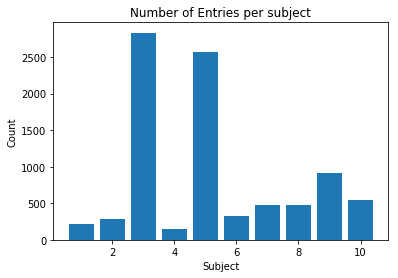

In [10]:
plt.bar(countframe.index, countframe['Result'])
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Number of Entries per subject')
plt.show();

#### Note: Number of Entries = Number of trials with first number as 5,6 * Number of electrodes for the subject

In preprocessing notebook, we determined the number of electrodes per subject to be as followed:

In [11]:
subject = [1,2,3,4,5,6,7,8,9,10]
electrodes = [5,6,59,5,61,7,11,10,19,16]
elecframe = pd.DataFrame(data={'Subject': subject, 'Num Electrode' : electrodes})
elecframe

,Subject,Num Electrode
0,1,5
1,2,6
2,3,59
3,4,5
4,5,61
5,6,7
6,7,11
7,8,10
8,9,19
9,10,16


In preprocessing notebook, we also determined the number of trials with 5 and 6 (in cleaned table, excluding all types of bad trials):

In [12]:
subject = [1,2,3,4,5,6,7,8,9,10]
num5 = [23, 24, 24, 12, 21, 22, 21, 24, 24, 16]
num6 = [20, 23, 24, 18, 21, 24, 22, 24, 24, 18]

trialframe = pd.DataFrame(data={'Subject': subject, 'Num 5': num5, 'Num 6': num6})
trialframe['Num Total Trials'] = trialframe['Num 5'] + trialframe['Num 6']
trialframe = trialframe.drop(['Num 5', 'Num 6'], axis=1)
trialframe

,Subject,Num Total Trials
0,1,43
1,2,47
2,3,48
3,4,30
4,5,42
5,6,46
6,7,43
7,8,48
8,9,48
9,10,34


Merging the two tables together:

In [13]:
confframe = pd.concat([elecframe, trialframe.drop('Subject', axis=1)], axis=1)
confframe['Expected Entries'] = confframe['Num Electrode'] * confframe['Num Total Trials']
confframe

,Subject,Num Electrode,Num Total Trials,Expected Entries
0,1,5,43,215
1,2,6,47,282
2,3,59,48,2832
3,4,5,30,150
4,5,61,42,2562
5,6,7,46,322
6,7,11,43,473
7,8,10,48,480
8,9,19,48,912
9,10,16,34,544


In [14]:
checkframe = pd.merge(confframe, countframe, how='inner', left_on='Subject', right_index=True)
checkframe

,Subject,Num Electrode,Num Total Trials,Expected Entries,Result
0,1,5,43,215,215
1,2,6,47,282,282
2,3,59,48,2832,2832
3,4,5,30,150,150
4,5,61,42,2562,2562
5,6,7,46,322,322
6,7,11,43,473,473
7,8,10,48,480,480
8,9,19,48,912,912
9,10,16,34,544,544


We now confirmed that our expected number of entries per subject matches the actual number of entries we obtained in the master dataframe created above. This indicates that the table above is likely created properly and it is safe to use it for further analysis.

Next, we need to understand the characteristics of our dataset, mainly to understand the probability of obtaining a correct prediction due to chance.

In [15]:
outframe = resultframe.groupby('Result').count().drop('Time Series', axis=1).drop(['psd'+str(i) for i in range(1,53)], axis=1).rename(index=str, columns={'Subject':'Count'})
outframe

,Count
Result,
Gamble,4999
Safebet,3773


We can observe that the distribution is not even between the two possible outcomes so we need to be careful when assessing the performance of our model. We will next calculate the prediction power of chance:

In [16]:
total = sum(outframe['Count'])
outframe['Probability'] = outframe['Count']/total
outframe

,Count,Probability
Result,,
Gamble,4999,0.569881
Safebet,3773,0.430119


We can observe that the probability of getting a correct prediction due to purely chance is 56.988% (~57%) so we need to design a prediction model that performs better than this. We will now move on to feature engineering to create new features.

## Making new features:

We currently have 52 power spectral density (psd) features obtained from preprocessed file. Need to create new features from our time series data

In [17]:
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd43,psd44,psd45,psd46,psd47,psd48,psd49,psd50,psd51,psd52
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-23.517804,-23.671044,-23.832134,-23.988357,-24.130512,-24.305455,-24.432737,-24.591489,-24.707532,-24.877753
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-23.703893,-23.880373,-24.004879,-24.167795,-24.317905,-24.436396,-24.587158,-24.724205,-24.838066,-24.979201
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-23.259485,-23.422230,-23.564590,-23.728011,-23.870765,-24.021337,-24.145242,-24.301972,-24.428880,-24.546487
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-22.983183,-23.134467,-23.268101,-23.408640,-23.552767,-23.678826,-23.799135,-23.934385,-24.057975,-24.173457
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-23.198373,-23.343375,-23.491024,-23.624363,-23.764645,-23.894672,-24.029405,-24.155022,-24.279145,-24.407797


In [18]:
resultframe['Max'] = [max(i) for i in resultframe['Time Series']]
resultframe['Min'] = [min(i) for i in resultframe['Time Series']]
resultframe['Std'] = [np.std(i) for i in resultframe['Time Series']]
resultframe['Mean'] = [np.mean(i) for i in resultframe['Time Series']]
resultframe['p2.5'] = [np.percentile(i, 2.5) for i in resultframe['Time Series']]
resultframe['p97.5'] = [np.percentile(i, 97.5) for i in resultframe['Time Series']]
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd49,psd50,psd51,psd52,Max,Min,Std,Mean,p2.5,p97.5
0,Safebet,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-24.432737,-24.591489,-24.707532,-24.877753,6.265171,-5.901294,2.641384,-0.725729,-5.120838,5.259906
1,Gamble,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-24.587158,-24.724205,-24.838066,-24.979201,8.834305,-6.981714,3.041047,-1.837577,-5.981095,6.011189
2,Gamble,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-24.145242,-24.301972,-24.428880,-24.546487,5.990934,-5.180958,2.428461,0.113014,-4.648406,5.095333
3,Gamble,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-23.799135,-23.934385,-24.057975,-24.173457,11.520736,-2.601536,3.001979,3.459670,-1.831723,10.736644
4,Gamble,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-24.029405,-24.155022,-24.279145,-24.407797,8.441465,-6.694187,2.791258,-1.049202,-5.968653,5.203513


Changing entries of "Result"

Safebet = 0, Gamble = 1:

In [19]:
resultframe['Result'] = resultframe['Result'].map({'Safebet': 0, 'Gamble': 1})
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd49,psd50,psd51,psd52,Max,Min,Std,Mean,p2.5,p97.5
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-24.432737,-24.591489,-24.707532,-24.877753,6.265171,-5.901294,2.641384,-0.725729,-5.120838,5.259906
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-24.587158,-24.724205,-24.838066,-24.979201,8.834305,-6.981714,3.041047,-1.837577,-5.981095,6.011189
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-24.145242,-24.301972,-24.428880,-24.546487,5.990934,-5.180958,2.428461,0.113014,-4.648406,5.095333
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-23.799135,-23.934385,-24.057975,-24.173457,11.520736,-2.601536,3.001979,3.459670,-1.831723,10.736644
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-24.029405,-24.155022,-24.279145,-24.407797,8.441465,-6.694187,2.791258,-1.049202,-5.968653,5.203513


We should center all our data to 0.0 since we care about relative wave form and not baseline amplitude. The difference in baseline amplitude can be ascribed to hardware differences (electrode readings) and should not be considered in our predictive model. Thus, we need to adapt our features above by centering the values around 0.0. Hence, mean is dropped as a feature and a new feature "Interval" which is max-min is introduced.

Interval = Max - Min

Percentile 2.5 and Percentile 97.5 values were determined as features above. Now, a new feature is going to be introduced "Percentile Interval" which is the difference between the two values. 

Percentile Interval = p97.5 - p2.5

In [20]:
resultframe['Max'] = resultframe['Max'] - resultframe['Mean']
resultframe['Min'] = resultframe['Min'] - resultframe['Mean']
resultframe['p2.5'] = resultframe['p2.5'] - resultframe['Mean']
resultframe['p97.5'] = resultframe['p97.5'] - resultframe['Mean']
resultframe['Mean'] = resultframe['Mean'] - resultframe['Mean']
resultframe['Interval'] = resultframe['Max'] - resultframe['Min']
resultframe['Percentile Interval'] = resultframe['p97.5'] - resultframe['p2.5']
#resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min', 'Std', 'Interval', 'p2.5', 'p97.5', 'Percentile Interval', 'Result']]
resultframe = resultframe.drop('Mean', axis=1)
resultframe

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd50,psd51,psd52,Max,Min,Std,p2.5,p97.5,Interval,Percentile Interval
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.81250,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-24.591489,-24.707532,-24.877753,6.990900,-5.175566,2.641384,-4.395109,5.985634,12.166465,10.380744
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.00000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-24.724205,-24.838066,-24.979201,10.671882,-5.144136,3.041047,-4.143518,7.848766,15.816019,11.992284
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.81250,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-24.301972,-24.428880,-24.546487,5.877920,-5.293972,2.428461,-4.761420,4.982319,11.171892,9.743739
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.00000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-23.934385,-24.057975,-24.173457,8.061066,-6.061206,3.001979,-5.291393,7.276974,14.122271,12.568367
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.00000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-24.155022,-24.279145,-24.407797,9.490667,-5.644985,2.791258,-4.919451,6.252715,15.135653,11.172166
5,1,1,"[-3.170818328857422, -3.543567657470703, -3.94...",0.00000,0.290208,0.290208,0.063188,-0.841189,-1.282107,-1.736642,...,-24.148555,-24.289607,-24.435390,6.933895,-9.552703,3.448838,-6.355072,6.499636,16.486598,12.854707
6,0,1,"[-3.8998281955718994, -4.050619125366211, -4.1...",3.90625,0.582234,0.539046,0.582234,-0.036016,-0.988773,-1.893479,...,-24.524137,-24.644524,-24.831178,10.137299,-5.527951,3.104352,-4.986908,7.585611,15.665250,12.572520
7,1,1,"[1.2145142555236816, 1.267301321029663, 1.3290...",11.71875,-0.213700,-1.788090,-2.225857,-1.481110,-0.213700,-1.186505,...,-25.939802,-26.059101,-26.203648,12.292831,-6.559959,3.137979,-5.090677,8.017166,18.852790,13.107843
8,1,1,"[-2.390714406967163, -2.1683504581451416, -1.9...",3.90625,-0.106911,-1.548896,-0.106911,-0.120515,-0.769870,-1.587518,...,-22.176070,-22.301648,-22.429897,39.404721,-9.212569,8.095704,-8.665738,30.760217,48.617290,39.425955
9,1,1,"[0.9719445705413818, 1.2123135328292847, 1.424...",7.81250,-0.198665,-0.798068,-1.905598,-0.198665,-0.295187,-1.953730,...,-24.696406,-24.811474,-24.915827,9.407723,-5.973242,3.192286,-5.683304,7.394775,15.380965,13.078080


Since all the features currently in place are statistics that do not respect the temporal nature of our data (time-series data), we need to introduce features that also respect the morphology of the waves in the data. An example feature is number of peaks.

Number of peaks = number of data points i where i > i-1 and i > i+1 and will not include the i=0 and i=949 entries

In [21]:
peaks = []

for series in resultframe['Time Series']:
    no_peaks = 0  
    indices = range(2,949)
    for index in indices:
        if series[index] > series[index-1] and series[index] > series[index+1]:
            no_peaks += 1
    peaks.append(no_peaks)
    
len(peaks)

8772

In [22]:
resultframe['Num Peaks'] = peaks
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd51,psd52,Max,Min,Std,p2.5,p97.5,Interval,Percentile Interval,Num Peaks
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-24.707532,-24.877753,6.990900,-5.175566,2.641384,-4.395109,5.985634,12.166465,10.380744,16
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-24.838066,-24.979201,10.671882,-5.144136,3.041047,-4.143518,7.848766,15.816019,11.992284,15
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-24.428880,-24.546487,5.877920,-5.293972,2.428461,-4.761420,4.982319,11.171892,9.743739,20
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-24.057975,-24.173457,8.061066,-6.061206,3.001979,-5.291393,7.276974,14.122271,12.568367,15
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-24.279145,-24.407797,9.490667,-5.644985,2.791258,-4.919451,6.252715,15.135653,11.172166,19


In [23]:
#resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Result']]
#resultframe.head()

#### Categorizing all our data

In [24]:
resultframe['Num Peaks Cat'] = pd.cut(resultframe['Num Peaks'], 4,labels=[1,2,3,4])
#resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Num Peaks Cat', 'Result']]
resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,psd52,Max,Min,Std,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-24.877753,6.990900,-5.175566,2.641384,-4.395109,5.985634,12.166465,10.380744,16,2
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-24.979201,10.671882,-5.144136,3.041047,-4.143518,7.848766,15.816019,11.992284,15,2
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-24.546487,5.877920,-5.293972,2.428461,-4.761420,4.982319,11.171892,9.743739,20,3
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-24.173457,8.061066,-6.061206,3.001979,-5.291393,7.276974,14.122271,12.568367,15,2
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-24.407797,9.490667,-5.644985,2.791258,-4.919451,6.252715,15.135653,11.172166,19,3


In [25]:
resultframe['p2.5 Cat'] = pd.qcut(resultframe['p2.5'], 3,labels=[1,2,3])
resultframe['p97.5 Cat'] = pd.qcut(resultframe['p97.5'], 3,labels=[1,2,3])
resultframe['Std Cat'] = pd.qcut(resultframe['Std'], 3,labels=[1,2,3])
resultframe['Percentile Interval Cat'] = pd.qcut(resultframe['Percentile Interval'], 3,labels=[1,2,3])

#resultframe = resultframe[['Subject', 'Time Series', 'Max', 'Min',  'Interval', 'Std', 'p2.5', 'p97.5', 'Percentile Interval', 'Num Peaks', 'Num Peaks Cat', 'p2.5 Cat', 'p97.5 Cat', 'Std Cat', 'Percentile Interval Cat', 'Result']]
resultframe

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.81250,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-4.395109,5.985634,12.166465,10.380744,16,2,3,1,1,1
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.00000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-4.143518,7.848766,15.816019,11.992284,15,2,3,1,1,1
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.81250,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-4.761420,4.982319,11.171892,9.743739,20,3,3,1,1,1
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.00000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-5.291393,7.276974,14.122271,12.568367,15,2,3,1,1,1
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.00000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-4.919451,6.252715,15.135653,11.172166,19,3,3,1,1,1
5,1,1,"[-3.170818328857422, -3.543567657470703, -3.94...",0.00000,0.290208,0.290208,0.063188,-0.841189,-1.282107,-1.736642,...,-6.355072,6.499636,16.486598,12.854707,18,3,2,1,1,1
6,0,1,"[-3.8998281955718994, -4.050619125366211, -4.1...",3.90625,0.582234,0.539046,0.582234,-0.036016,-0.988773,-1.893479,...,-4.986908,7.585611,15.665250,12.572520,17,2,3,1,1,1
7,1,1,"[1.2145142555236816, 1.267301321029663, 1.3290...",11.71875,-0.213700,-1.788090,-2.225857,-1.481110,-0.213700,-1.186505,...,-5.090677,8.017166,18.852790,13.107843,18,3,3,1,1,1
8,1,1,"[-2.390714406967163, -2.1683504581451416, -1.9...",3.90625,-0.106911,-1.548896,-0.106911,-0.120515,-0.769870,-1.587518,...,-8.665738,30.760217,48.617290,39.425955,15,2,1,3,3,3
9,1,1,"[0.9719445705413818, 1.2123135328292847, 1.424...",7.81250,-0.198665,-0.798068,-1.905598,-0.198665,-0.295187,-1.953730,...,-5.683304,7.394775,15.380965,13.078080,12,1,3,1,1,1


In [26]:
resultframe['Num Peaks Cat'] = resultframe['Num Peaks Cat'].astype(int)
resultframe['p2.5 Cat'] = resultframe['p2.5 Cat'].astype(int)
resultframe['p97.5 Cat'] = resultframe['p97.5 Cat'].astype(int)
resultframe['Std Cat'] = resultframe['Std Cat'].astype(int)
resultframe['Percentile Interval Cat'] = resultframe['Percentile Interval Cat'].astype(int)

resultframe.head()

,Result,Subject,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,...,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat
0,0,1,"[-3.7782058715820312, -3.9974231719970703, -4....",7.8125,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,...,-4.395109,5.985634,12.166465,10.380744,16,2,3,1,1,1
1,1,1,"[1.0019606351852417, 0.737346351146698, 0.4520...",0.0000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,...,-4.143518,7.848766,15.816019,11.992284,15,2,3,1,1,1
2,1,1,"[5.230727195739746, 5.047644138336182, 4.87180...",7.8125,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,...,-4.761420,4.982319,11.171892,9.743739,20,3,3,1,1,1
3,1,1,"[6.716716289520264, 6.5874199867248535, 6.4329...",0.0000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,...,-5.291393,7.276974,14.122271,12.568367,15,2,3,1,1,1
4,1,1,"[-4.0423502922058105, -4.200969219207764, -4.3...",0.0000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,...,-4.919451,6.252715,15.135653,11.172166,19,3,3,1,1,1


### Checking our X and y matrices (selecting only features we want to pass into the model)

In [27]:
resultframe.loc[:,["Subject", "Result"]][resultframe['Subject']==1].drop('Subject', axis=1).head()

,Result
0,0
1,1
2,1
3,1
4,1


In [28]:
#resultframe.iloc[:,[1,3]][resultframe['Subject']==1].drop("Subject", axis=1).head()

resultframe.drop(["Subject", "Time Series", "Result"], axis=1)

,psd1,psd2,psd3,psd4,psd5,psd6,psd7,psd8,psd9,psd10,...,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat
0,7.81250,-0.545563,-1.429841,-1.669953,-0.545563,-0.972360,-1.971208,-2.819755,-3.269320,-3.791273,...,-4.395109,5.985634,12.166465,10.380744,16,2,3,1,1,1
1,0.00000,0.232509,0.232509,0.090287,-2.379751,-2.026234,-1.578224,-2.779893,-2.684491,-3.515546,...,-4.143518,7.848766,15.816019,11.992284,15,2,3,1,1,1
2,7.81250,-0.540405,-2.698153,-1.178551,-0.540405,-1.112088,-1.333428,-1.820602,-1.693696,-2.574341,...,-4.761420,4.982319,11.171892,9.743739,20,3,3,1,1,1
3,0.00000,0.738161,0.738161,0.166153,-1.517426,-1.495675,-2.170359,-2.932727,-2.628012,-3.818630,...,-5.291393,7.276974,14.122271,12.568367,15,2,3,1,1,1
4,0.00000,-1.441424,-1.441424,-2.031065,-2.096541,-2.775728,-1.623469,-1.658006,-2.652296,-3.709250,...,-4.919451,6.252715,15.135653,11.172166,19,3,3,1,1,1
5,0.00000,0.290208,0.290208,0.063188,-0.841189,-1.282107,-1.736642,-2.831594,-2.107423,-3.987538,...,-6.355072,6.499636,16.486598,12.854707,18,3,2,1,1,1
6,3.90625,0.582234,0.539046,0.582234,-0.036016,-0.988773,-1.893479,-1.733387,-2.065802,-4.223691,...,-4.986908,7.585611,15.665250,12.572520,17,2,3,1,1,1
7,11.71875,-0.213700,-1.788090,-2.225857,-1.481110,-0.213700,-1.186505,-2.018232,-2.144263,-3.852997,...,-5.090677,8.017166,18.852790,13.107843,18,3,3,1,1,1
8,3.90625,-0.106911,-1.548896,-0.106911,-0.120515,-0.769870,-1.587518,-1.593378,-3.283164,-4.123357,...,-8.665738,30.760217,48.617290,39.425955,15,2,1,3,3,3
9,7.81250,-0.198665,-0.798068,-1.905598,-0.198665,-0.295187,-1.953730,-2.437909,-2.741802,-4.407712,...,-5.683304,7.394775,15.380965,13.078080,12,1,3,1,1,1


# Modeling

## Logistic Regression

### Initialize dataframe to track model performance per subject

In [29]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN


### Train model

In [30]:
coefficients = dict()

# initialize dataframes to log predicted choice and true choice for each trial
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

LogisticRegressionModel = linear_model.LogisticRegression()

# two subclasses to start
for subject in subjects:
    print(subject)
    #X = resultframe.iloc[:,[0,5,8,10,11,12]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    #y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    X = resultframe.drop(["Time Series", "Result", 'Min','Max','Interval', 'p2.5','p97.5', 'Std Cat', 'Percentile Interval', 'Num Peaks'], axis=1)[resultframe['Subject']==subject].drop("Subject", axis=1)
    y = resultframe.loc[:,["Subject", "Result"]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_logistic.loc[subject, 'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_logistic_train['true_choice'] = ytrain['Result']
    predictions_logistic_test['true_choice'] = ytest['Result']
    
    # logistic regression
    LogisticRegressionModel.fit(Xtrain, ytrain)
    
    # store coefficients
    coefficients[subject] = LogisticRegressionModel.coef_[0]
    
    performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
    performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

    # complete the guesses for each person
    predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
    predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)
    
    # concatenate dfs
    predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
    predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])

1
2
3
4
5


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

6
7
8
9
10


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [31]:
%matplotlib inline

In [32]:
performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0,0,0.77907,0.674419
2,0,0,0.64,0.631579
3,0,0,0.579249,0.552028
4,0,0,0.733333,0.566667
5,0,0,0.759395,0.769981
6,0,0,0.568093,0.553846
7,0,0,0.838624,0.831579
8,0,0,0.596354,0.583333
9,0,0,0.618656,0.612022
10,0,0,0.57931,0.458716


In [33]:
train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.6599657827202737, 0.6387940841865757)

### FEATURE SELECTION

since not much improvement has been seen in iter5, I will attempt to selectivly include features from our current feature set that demonstrates strong predictive powers. I will first see any collinear features

In [34]:
train, test = train_test_split(resultframe, test_size=0.2, random_state=100)
train_df = train.iloc[:, 2:]

train_df.head()

,Time Series,psd1,psd2,psd3,psd4,psd5,psd6,psd7,psd8,psd9,...,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat
5007,"[16.386049270629883, 15.695533752441406, 15.01...",3.90625,0.600054,0.584937,0.600054,0.305692,-0.394279,-2.202193,-3.593516,-3.106671,...,-6.328954,8.933122,21.601470,15.262075,18,3,2,2,2,2
8410,"[1.9825671911239624, 1.8832063674926758, 1.778...",7.81250,-0.630295,-4.141261,-1.314077,-0.630295,-0.848107,-1.861650,-2.533144,-2.265721,...,-4.552175,6.087747,12.745581,10.639922,15,2,3,1,1,1
3081,"[16.15672492980957, 16.429122924804688, 16.667...",3.90625,1.158954,0.906054,1.158954,0.261979,-0.947783,-0.809197,-1.962275,-2.422881,...,-7.420488,13.609491,25.068027,21.029979,16,2,1,3,3,3
4005,"[9.810583114624023, 9.760906219482422, 9.74815...",0.00000,-0.518609,-0.518609,-0.897111,-1.369014,-1.218362,-1.264222,-2.692251,-2.768381,...,-4.886804,9.163159,17.439383,14.049963,20,3,3,2,1,1
5594,"[-2.714580774307251, -2.274975538253784, -1.85...",3.90625,1.064544,0.847032,1.064544,0.284315,-0.560182,-1.767900,-2.711383,-2.719377,...,-6.308773,8.866447,18.494427,15.175220,15,2,2,2,2,2


In [35]:
train_df.corr()

,psd1,psd2,psd3,psd4,psd5,psd6,psd7,psd8,psd9,psd10,...,p2.5,p97.5,Interval,Percentile Interval,Num Peaks,Num Peaks Cat,p2.5 Cat,p97.5 Cat,Std Cat,Percentile Interval Cat
psd1,1.000000,-0.413175,-0.610697,-0.381708,0.152130,0.155473,0.035986,0.017839,0.006529,0.010593,...,0.076875,-0.064380,-0.052864,-0.072727,-0.029355,-0.011848,0.037328,-0.059194,-0.049342,-0.056909
psd2,-0.413175,1.000000,0.874600,0.940346,0.505229,0.362951,0.335998,0.297225,0.251732,0.218870,...,-0.521071,0.473227,0.487220,0.523632,-0.090404,-0.077307,-0.418188,0.476046,0.515000,0.487757
psd3,-0.610697,0.874600,1.000000,0.814928,0.283326,0.216750,0.243647,0.207178,0.188469,0.162839,...,-0.405853,0.343836,0.352487,0.387240,-0.031590,-0.028443,-0.321004,0.349758,0.376398,0.357514
psd4,-0.381708,0.940346,0.814928,1.000000,0.531016,0.345642,0.345033,0.302046,0.246205,0.198025,...,-0.512499,0.479460,0.490908,0.526688,-0.091158,-0.079815,-0.420610,0.482579,0.526619,0.495979
psd5,0.152130,0.505229,0.283326,0.531016,1.000000,0.643177,0.430508,0.369833,0.295480,0.260050,...,-0.497034,0.450888,0.482713,0.499053,-0.189691,-0.159768,-0.441779,0.462110,0.511444,0.486512
psd6,0.155473,0.362951,0.216750,0.345642,0.643177,1.000000,0.631428,0.384732,0.298252,0.288887,...,-0.461034,0.375463,0.435266,0.427301,-0.165015,-0.145923,-0.423407,0.396281,0.443966,0.424684
psd7,0.035986,0.335998,0.243647,0.345033,0.430508,0.631428,1.000000,0.605689,0.367120,0.356306,...,-0.454763,0.323329,0.402352,0.382337,-0.014436,-0.000857,-0.398317,0.334368,0.403710,0.385267
psd8,0.017839,0.297225,0.207178,0.302046,0.369833,0.384732,0.605689,1.000000,0.605530,0.363713,...,-0.426097,0.275081,0.359181,0.335035,0.084875,0.074281,-0.374590,0.285750,0.361079,0.342932
psd9,0.006529,0.251732,0.188469,0.246205,0.295480,0.298252,0.367120,0.605530,1.000000,0.602590,...,-0.352106,0.211713,0.295490,0.263869,0.210030,0.174714,-0.307378,0.234253,0.277623,0.258692
psd10,0.010593,0.218870,0.162839,0.198025,0.260050,0.288887,0.356306,0.363713,0.602590,1.000000,...,-0.327141,0.210657,0.296076,0.256778,0.321325,0.279613,-0.300259,0.259247,0.295273,0.272673


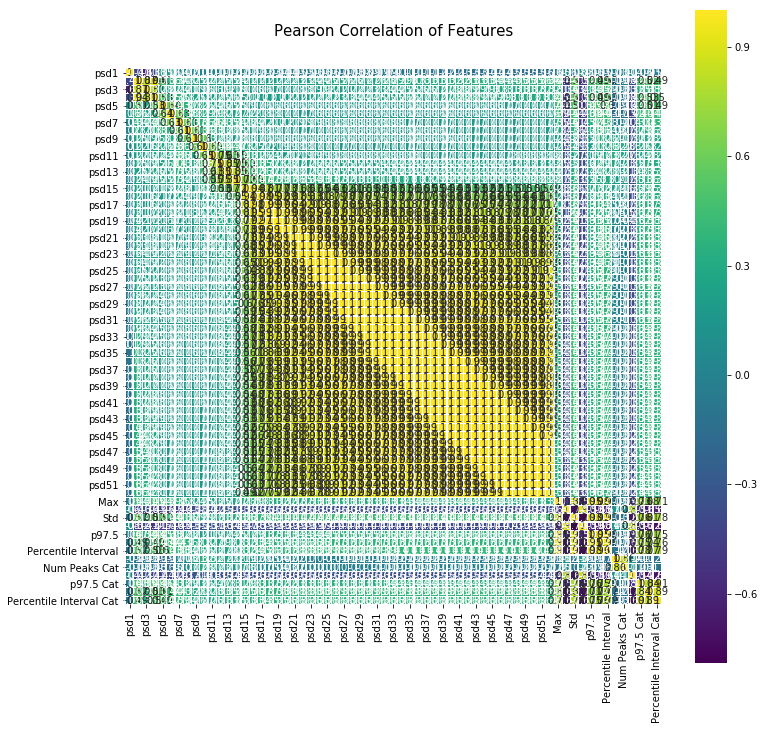

In [36]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

UPDATE: since we now have over 65 features, the graph above is no longer useful as tiles are very small.  Will try using PCA to select my features  (I used Pearson Correlation graph above when we had only 10 features).

OLD/IGNORE: As seen in the chart above, the correlation between different features is generally pretty high. Thus, we need to be more selective in choosing features for this model as uncorrelated features are generally more powerful predictors

OLD/IGNROE: Will try these features: num peaks cat, percentile interval, std, p97.5 cat, p2.5 cat

### Dimensionality reduction using PCA:

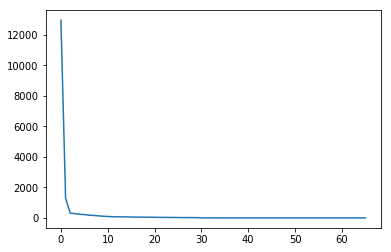

In [49]:
from numpy.linalg import svd

X = resultframe.drop(["Time Series", "Result"], axis=1)

# feature extraction
U, sig, Vh = svd(X, full_matrices = True)

plt.plot(range(len(sig)), sig)

In [51]:
print(X.shape, sig.shape, U.shape, Vh.shape)

(8772, 66) (66,) (8772, 8772) (66, 66)


In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit = pca.fit(X)

X_reduced = fit.components_.T

In [53]:
print(X_reduced.shape)

(66, 2)


From the plot of the singular values, we see that the first principle component explains most of the variance. Despite having low variance features, our train and test accuracy is extremely similar. Hence, high variance does not seem to be as big of a problem for our model as lack of expressiveness (high bias). We now attempt to use a more expressive model (neural net) to solve this problem.

## Use a neural net for prediction

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Activation

first_hidden_size = 140     #Play around with this number
input_shape = Xtrain.shape[1]

print(input_shape)
model = Sequential()
model.add(Dense(first_hidden_size, input_dim = input_shape, activation = 'relu'))
model.add(Dense(first_hidden_size, activation = 'tanh'))
model.add(Dense(35, activation = 'tanh'))   #Play around with this number
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('model compiled. Starting to fit now')

model.fit(Xtrain, ytrain, epochs = 15)   #Play around with epoch number

57
model compiled. Starting to fit now
Epoch 1/15
435/435 [==============================] - 2s 5ms/step - loss: 2.2724 - acc: 0.3126
Epoch 2/15
435/435 [==============================] - 0s 310us/step - loss: 1.9022 - acc: 0.4966
Epoch 3/15
435/435 [==============================] - 0s 303us/step - loss: 1.8734 - acc: 0.4989
Epoch 4/15
435/435 [==============================] - 0s 328us/step - loss: 1.8706 - acc: 0.4989
Epoch 5/15
435/435 [==============================] - 0s 367us/step - loss: 1.8697 - acc: 0.4989
Epoch 6/15
435/435 [==============================] - 0s 309us/step - loss: 1.8693 - acc: 0.4989
Epoch 7/15
435/435 [==============================] - 0s 310us/step - loss: 1.8689 - acc: 0.4989
Epoch 8/15
435/435 [==============================] - 0s 320us/step - loss: 1.8687 - acc: 0.4989
Epoch 9/15
435/435 [==============================] - 0s 406us/step - loss: 1.8685 - acc: 0.4989
Epoch 10/15
435/435 [==============================] - 0s 360us/step - loss: 1.8683 - acc:

## Random Forest

### Initialize dataframe to track model performance per subject

In [36]:
performance_forest = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### Initialize dataframes to log predicted choice and true choice for each trial

In [37]:
feature_importances = dict()

predictions_forest_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
predictions_forest_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

random_forest = RandomForestClassifier()

# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_forest.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_forest.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_forest_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_forest_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_forest_train['true_choice'] = ytrain['Result']
    predictions_forest_test['true_choice'] = ytest['Result']
    
    # model
    random_forest.fit(Xtrain, ytrain)
    performance_forest.loc[subject,'model_train_accuracy'] = random_forest.score(Xtrain,ytrain)
    performance_forest.loc[subject,'model_test_accuracy'] = random_forest.score(Xtest,ytest)
    
    # store feature importances
    feature_importances[subject] = random_forest.feature_importances_
    
    # complete the guesses for each person
    predictions_forest_train['predicted_choice'] = random_forest.predict(Xtrain)
    predictions_forest_test['predicted_choice'] = random_forest.predict(Xtest)
    
    # concatenate dfs
    predictions_forest_train_master  = pd.concat([predictions_forest_train_master, predictions_forest_train])
    predictions_forest_test_master  = pd.concat([predictions_forest_test_master, predictions_forest_test])

1
2
3
4


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5
6
7
8
9


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py

10


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [38]:
performance_forest

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0,0,0.994186,0.72093
2,0,0,0.968889,0.578947
3,0,0,0.981015,0.534392
4,0,0,0.958333,0.666667
5,0,0,0.981454,0.701754
6,0,0,0.988327,0.492308
7,0,0,0.986772,0.757895
8,0,0,0.971354,0.5625
9,0,0,0.973937,0.557377
10,0,0,0.972414,0.53211


In [39]:
train_accuracy_total = np.mean(predictions_forest_train_master['true_choice'] == predictions_forest_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_forest_test_master['true_choice'] == predictions_forest_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.979469632164243, 0.60580204778157)

Overfits a lot

## logistic regression modified with StandardScaler(), i.e., z-scoring the data before fitting model

### initialize dataframe to track model performance per subject

In [40]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### initialize dataframes to log predicted choice and true choice for each trial

In [41]:
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

In [42]:
LogisticRegressionModel = linear_model.LogisticRegression()

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif # use f_regression for afresh feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(SelectKBest(k=50), StandardScaler(), linear_model.LogisticRegressionCV())
pipe = make_pipeline(StandardScaler(), linear_model.LogisticRegressionCV())
LogisticRegressionModel = pipe

In [44]:
# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_logistic.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_logistic_train['true_choice'] = ytrain['Result']
    predictions_logistic_test['true_choice'] = ytest['Result']
    
    # logistic regression
    LogisticRegressionModel.fit(Xtrain, ytrain)
    performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
    performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

    # complete the guesses for each person
    predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
    predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)
    
    # concatenate dfs
    predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
    predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])

1


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
3


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
6


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
performance_logistic

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0,0,0.69186,0.837209
2,0,0,0.613333,0.631579
3,0,0,0.56468,0.574956
4,0,0,0.683333,0.466667
5,0,0,0.759883,0.769981
6,0,0,0.521401,0.523077
7,0,0,0.838624,0.831579
8,0,0,0.575521,0.614583
9,0,0,0.622771,0.63388
10,0,0,0.501149,0.348624


In [46]:
train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.6442828628457371, 0.6444823663253697)

## random forest with StandardScaler()

### initialize dataframe to track model performance per subject

In [47]:
performance_forest = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### initialize dataframes to log predicted choice and true choice for each trial

In [49]:
feature_importances = dict()

predictions_forest_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
predictions_forest_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

random_forest = RandomForestClassifier()

# two subclasses to start
for subject in subjects:
    print(subject)
    X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
    y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
    
    # standardize data here
    scaler.fit(X)
    X = scaler.transform(X)
    
    # train-test split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
    
    # get naive performance (guessing most frequent category, the max of guessing one vs the other)
    performance_forest.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    performance_forest.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
    
    # make df to track predicted vs real choice for each subject
    predictions_forest_train = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
    predictions_forest_test = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])
        
    predictions_forest_train['true_choice'] = ytrain['Result']
    predictions_forest_test['true_choice'] = ytest['Result']
    
    # model
    random_forest.fit(Xtrain, ytrain)
    performance_forest.loc[subject,'model_train_accuracy'] = random_forest.score(Xtrain,ytrain)
    performance_forest.loc[subject,'model_test_accuracy'] = random_forest.score(Xtest,ytest)
    
    # store feature importances
    feature_importances[subject] = random_forest.feature_importances_
    
    # complete the guesses for each person
    predictions_forest_train['predicted_choice'] = random_forest.predict(Xtrain)
    predictions_forest_test['predicted_choice'] = random_forest.predict(Xtest)
    
    # concatenate dfs
    predictions_forest_train_master  = pd.concat([predictions_forest_train_master, predictions_forest_train])
    predictions_forest_test_master  = pd.concat([predictions_forest_test_master, predictions_forest_test])

1


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2
3


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5
6


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8
9
10


/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/anaconda3/envs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [50]:
performance_forest

,naive_train_accuracy,naive_test_accuracy,model_train_accuracy,model_test_accuracy
1,0,0,0.976744,0.534884
2,0,0,0.986667,0.45614
3,0,0,0.977925,0.511464
4,0,0,0.95,0.666667
5,0,0,0.981942,0.676413
6,0,0,0.953307,0.461538
7,0,0,0.970899,0.8
8,0,0,0.971354,0.572917
9,0,0,0.965706,0.579235
10,0,0,0.951724,0.440367


In [51]:
train_accuracy_total = np.mean(predictions_forest_train_master['true_choice'] == predictions_forest_train_master['predicted_choice']) 
test_accuracy_total = np.mean(predictions_forest_test_master['true_choice'] == predictions_forest_test_master['predicted_choice'])

train_accuracy_total, test_accuracy_total

(0.9743370402053037, 0.580773606370876)

## logistic regression with StandardScaler() *and* selecting K best features (reducing the number of features, should reduce overfitting)

### initialize dataframe to track model performance per subject

In [52]:
performance_logistic = pd.DataFrame(index = Xdict.keys(), # subject
                                    columns=['naive_train_accuracy',
                                             'naive_test_accuracy',
                                             'model_train_accuracy',
                                             'model_test_accuracy'])

### initialize dataframes to log predicted choice and true choice for each trial

In [53]:
predictions_logistic_train_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

predictions_logistic_test_master = pd.DataFrame(columns=['predicted_choice',
                                                   'true_choice'])

In [54]:
LogisticRegressionModel = linear_model.LogisticRegression()

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif # use f_regression for afresh feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#### try different numbers of num_k

In [56]:
num_k = [1,2,3,4] # max number of features is 4

for k in num_k:
    pipe = make_pipeline(SelectKBest(k=k), StandardScaler(), linear_model.LogisticRegressionCV())
    LogisticRegressionModel = pipe

    # two subclasses to start
    for subject in subjects:
        print(subject)
        X = resultframe.iloc[:,[0,4,6,7,8]][resultframe['Subject']==subject].drop("Subject", axis=1)   
        y = resultframe.iloc[:,[0,-1]][resultframe['Subject']==subject].drop('Subject', axis=1)
        # train-test split
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)

        # get naive performance (guessing most frequent category, the max of guessing one vs the other)
        performance_logistic.loc[subject,'naive_train_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))
        performance_logistic.loc[subject,'naive_test_accuracy'] = max(float(np.mean(ytrain=='Gamble')),float(np.mean(ytrain=='Safebet')))

        # make df to track predicted vs real choice for each subject
        predictions_logistic_train = pd.DataFrame(columns=['predicted_choice',
                                                       'true_choice'])
        predictions_logistic_test = pd.DataFrame(columns=['predicted_choice',
                                                       'true_choice'])

        predictions_logistic_train['true_choice'] = ytrain['Result']
        predictions_logistic_test['true_choice'] = ytest['Result']

        # logistic regression
        LogisticRegressionModel.fit(Xtrain, ytrain)
        performance_logistic.loc[subject,'model_train_accuracy'] = LogisticRegressionModel.score(Xtrain,ytrain)
        performance_logistic.loc[subject,'model_test_accuracy'] = LogisticRegressionModel.score(Xtest,ytest)

        # complete the guesses for each person
        predictions_logistic_train['predicted_choice'] = LogisticRegressionModel.predict(Xtrain)
        predictions_logistic_test['predicted_choice'] = LogisticRegressionModel.predict(Xtest)

        # concatenate dfs
        predictions_logistic_train_master  = pd.concat([predictions_logistic_train_master, predictions_logistic_train])
        predictions_logistic_test_master  = pd.concat([predictions_logistic_test_master, predictions_logistic_test])
    
    train_accuracy_total = np.mean(predictions_logistic_train_master['true_choice'] == predictions_logistic_train_master['predicted_choice']) 
    test_accuracy_total = np.mean(predictions_logistic_test_master['true_choice'] == predictions_logistic_test_master['predicted_choice'])
    print(k, train_accuracy_total, test_accuracy_total)

1
2
3


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

4
5
6
7


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

8
9
10
1 0.6447105788423154 0.6581342434584755
1


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

2
3


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

4
5


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

6
7


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

8
9
10


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

2 0.6444254348445965 0.6569965870307167
1
2
3


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

4
5


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

6
7
8


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

9
10
3 0.6445680068434559 0.6549108835798255
1
2


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

3
4
5


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

6
7
8
9


/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

10
4 0.6444967208440262 0.6523037542662116


### Trying other models

In [57]:
X = resultframe.iloc[:,[4,6,7,8]]   
y = resultframe.iloc[:,-1]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in test data:',len(x_test))

Number of samples in training data: 7017
Number of samples in test data: 1755


In [59]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(x_train, y_train)
perceptron_train_acc = perceptron.score(x_train, y_train)
perceptron_test_acc = perceptron.score(x_test, y_test)
print ('perceptron training acuracy= ',perceptron_train_acc)
print('perceptron test accuracy= ',perceptron_test_acc)

perceptron training acuracy=  0.5699016673792219
perceptron test accuracy=  0.5698005698005698


In [60]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
adaboost_train_acc = adaboost.score(x_train, y_train)
adaboost_test_acc = adaboost.score(x_test, y_test)
print ('adaboost training acuracy= ',adaboost_train_acc)
print('adaboost test accuracy= ',adaboost_test_acc)

adaboost training acuracy=  0.5768847085649138
adaboost test accuracy=  0.5726495726495726


In [61]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest_train_acc = random_forest.score(x_train, y_train)
random_forest_test_acc = random_forest.score(x_test, y_test)
print('random_forest training acuracy= ',random_forest_train_acc)
print('random_forest test accuracy= ',random_forest_test_acc)

random_forest training acuracy=  0.7377796779250392
random_forest test accuracy=  0.5162393162393163


#### ALL THREE MODELS WORSE THAN CHANCE! 